In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/wine.csv')

data = df[['alcohol', 'sugar', 'pH']]
target = df['class']

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [12]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'min_impurity_decrease': uniform(0.0001, 0.01),
    'max_depth': randint(20, 50),
    'min_samples_split': randint(2, 25),
    'min_samples_leaf': randint(1, 25)
}

rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, random_state=42)
rs.fit(train_input, train_target)

print(rs.best_params_)
print(rs.best_score_)

dt = rs.best_estimator_
print(dt.score(test_input, test_target))

{'max_depth': 36, 'min_impurity_decrease': np.float64(0.00047348188749214416), 'min_samples_leaf': 6, 'min_samples_split': 16}
0.8664622047827054
0.86


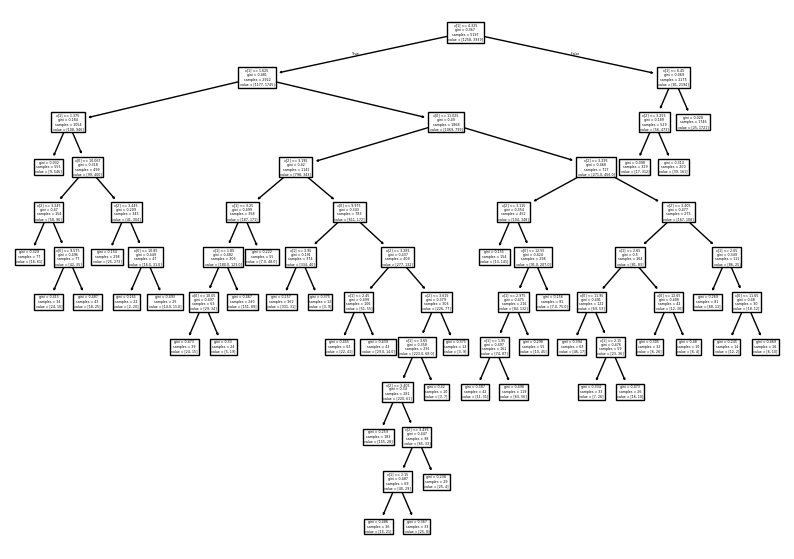

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()